In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_frame = pd.read_csv("./agaricus-lepiota.data")

data_frame.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [3]:
data_frame.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
edibility = data_frame[data_frame['edibility'] == 'p']
non_edibility = data_frame[data_frame['edibility'] == 'e']

(array([1408.,    0.,    0.,  256.,    0.,    0.,   96.,    0.,    0.,
           0., 1880.,    0.,    0.,  136.,    0.,    0.,  192.,    0.,
           0.,  240.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
        3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <BarContainer object of 20 artists>)

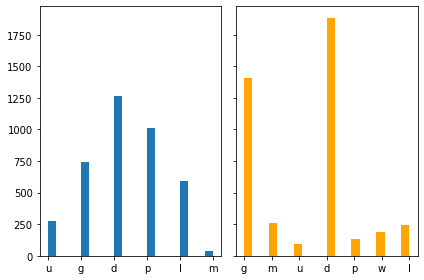

In [5]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(edibility['habitat'], bins=20)
axs[1].hist(non_edibility['habitat'], bins=20, color='orange')

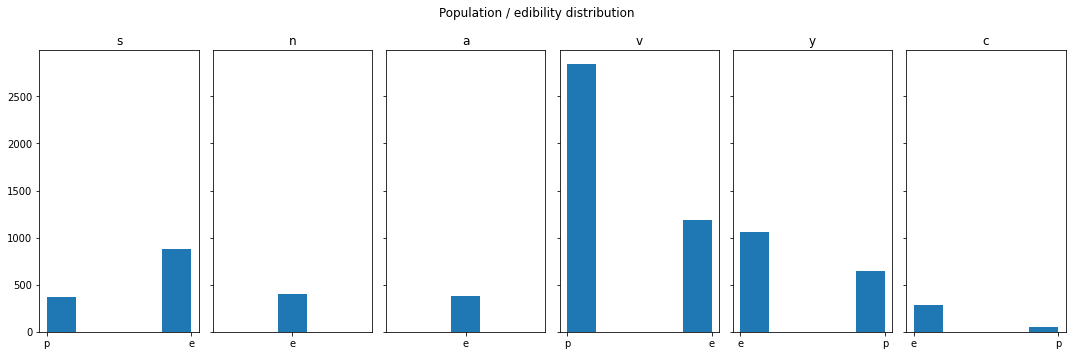

In [6]:
fig, axs = plt.subplots(1, len(data_frame['population'].unique()), sharey=True, tight_layout=True, figsize=(15,5))
fig.suptitle('Population / edibility distribution')

for index, population in enumerate(data_frame['population'].unique().tolist()):
	axs[index].title.set_text(population)
	axs[index].hist(data_frame[data_frame['population'] == population]['edibility'], bins=5)
	

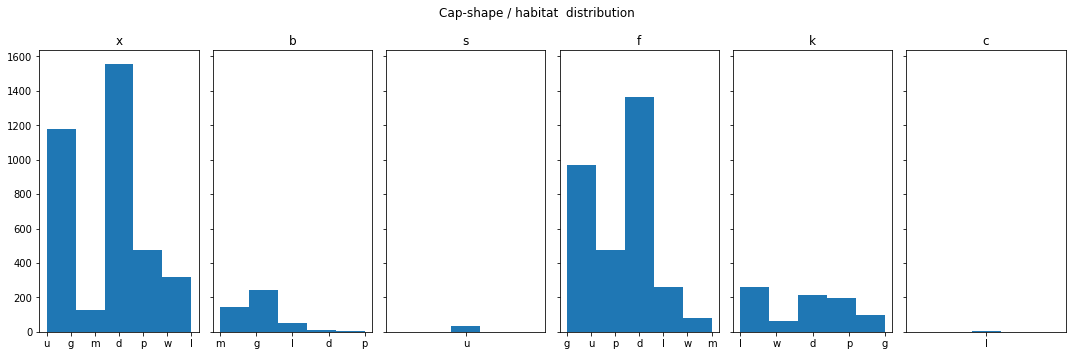

In [7]:
fig, axs = plt.subplots(1, len(data_frame['cap-shape'].unique()), sharey=True, tight_layout=True, figsize=(15,5))
fig.suptitle('Cap-shape / habitat  distribution')

for index, shape in enumerate(data_frame['cap-shape'].unique().tolist()):
	axs[index].title.set_text(shape)
	axs[index].hist(data_frame[data_frame['cap-shape'] == shape]['habitat'], bins=5)

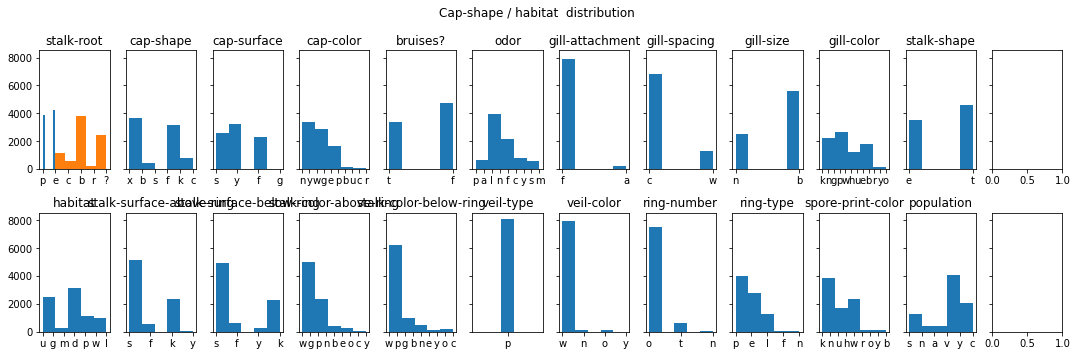

In [8]:
fig, axs = plt.subplots(2, (len(data_frame.columns)//2) + 1, sharey=True, tight_layout=True, figsize=(15,5))
fig.suptitle('Cap-shape / habitat  distribution')  

for index, col in enumerate(data_frame.columns):
	axs[index // 12][index% 11].title.set_text(col)
	axs[index // 12][index % 11].hist(data_frame[col], bins=5)

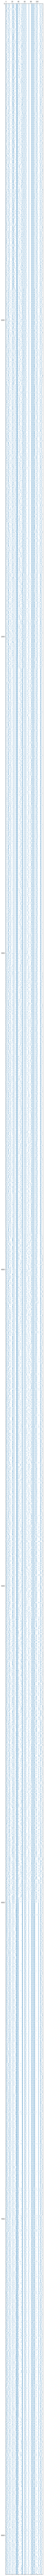

In [11]:
dummies = pd.get_dummies(data_frame)
plt.spy(dummies, markersize=1)
fig = plt.gcf()
fig.set_size_inches(60,320)
plt.plot()
plt.show()